In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

# Load The Dataset

In [16]:
df = pd.read_csv('Customer_Data.csv')

# Data Exploration

In [17]:
df.shape

(8950, 18)

In [18]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data Cleaning

In [21]:
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [25]:
imputer = SimpleImputer(strategy='mean')
df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']] = imputer.fit_transform(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']])

In [27]:
print(df.duplicated().sum())

0


In [28]:
print(df.dtypes)

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


# EDA

In [29]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


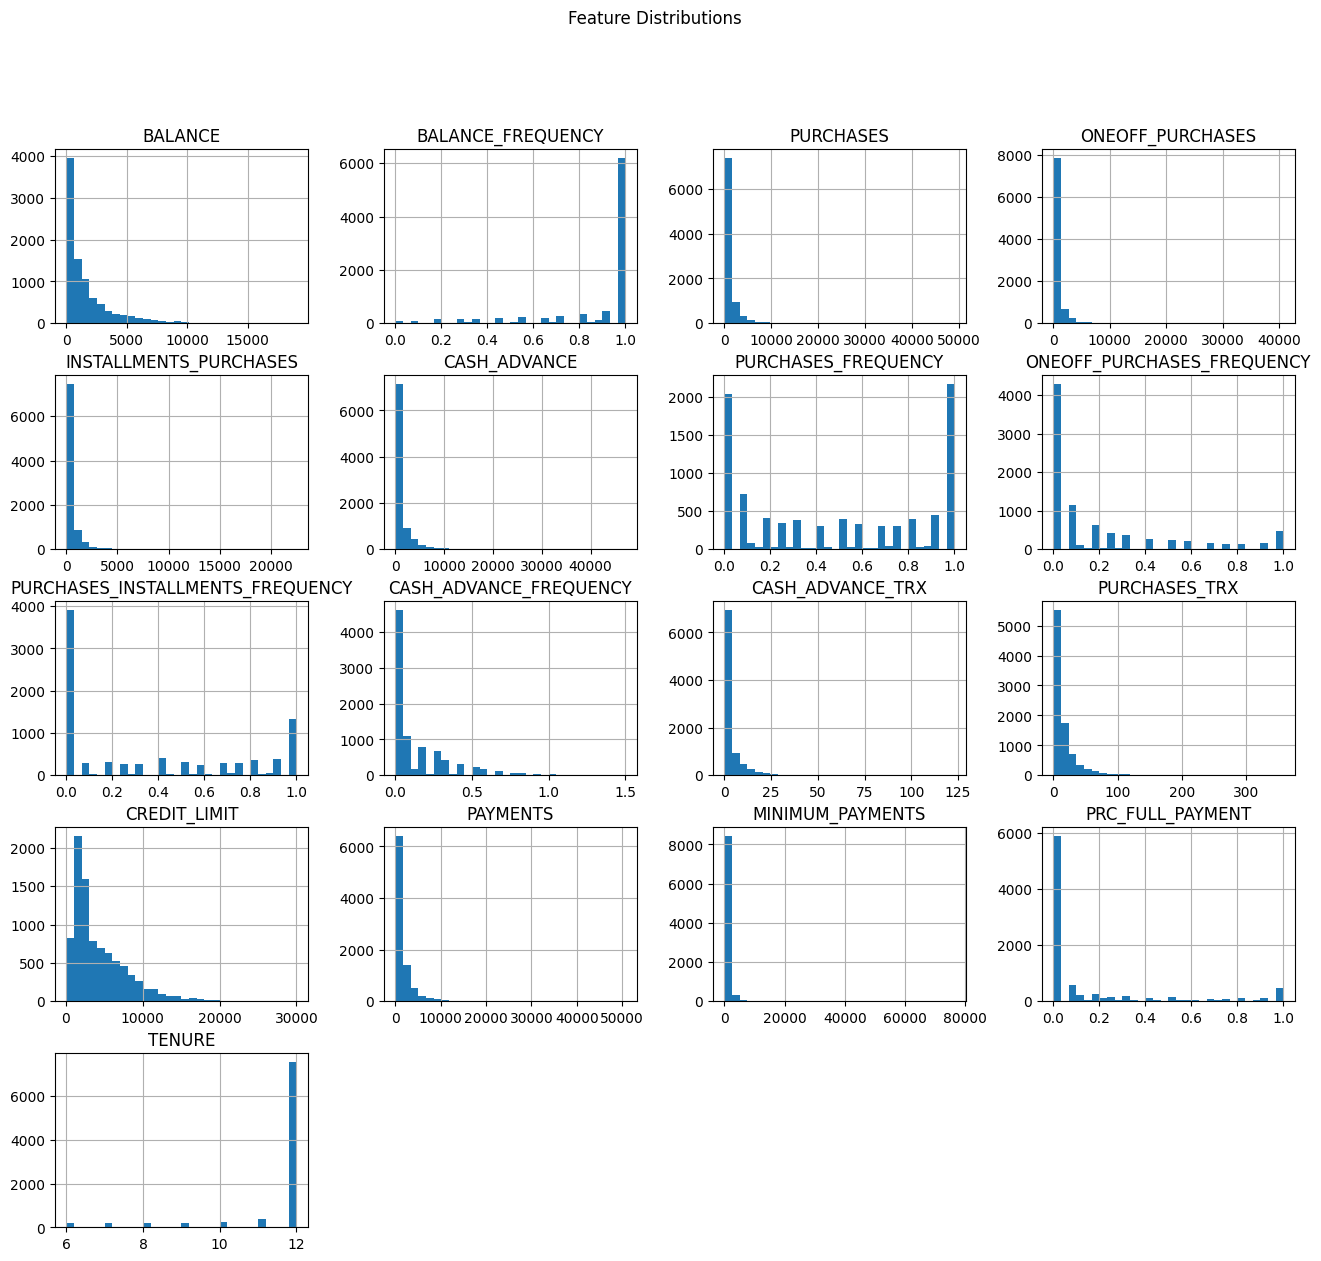

In [32]:
df.hist(bins=30, figsize=(16, 14))
plt.suptitle("Feature Distributions")
plt.show()

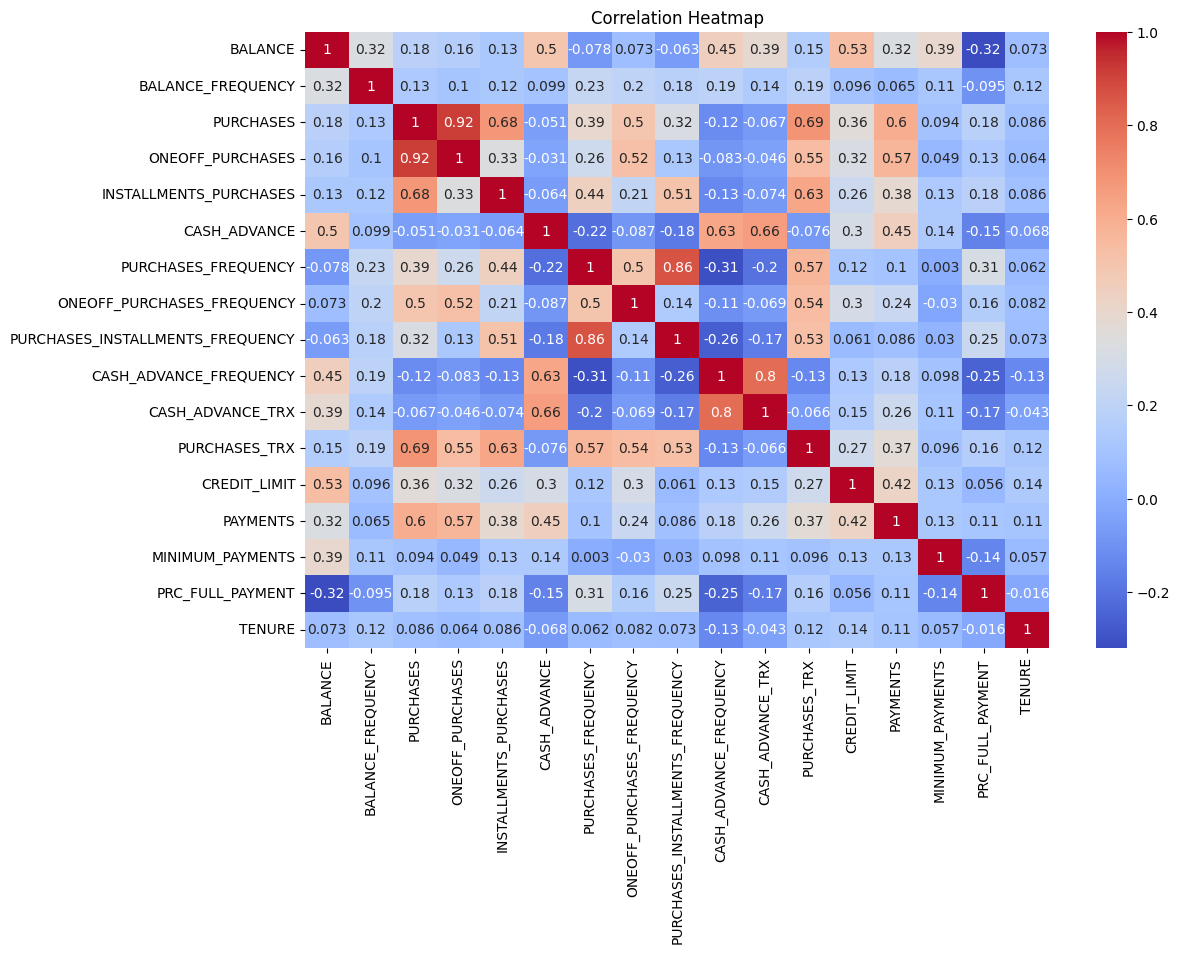

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('CUST_ID', axis=1).corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

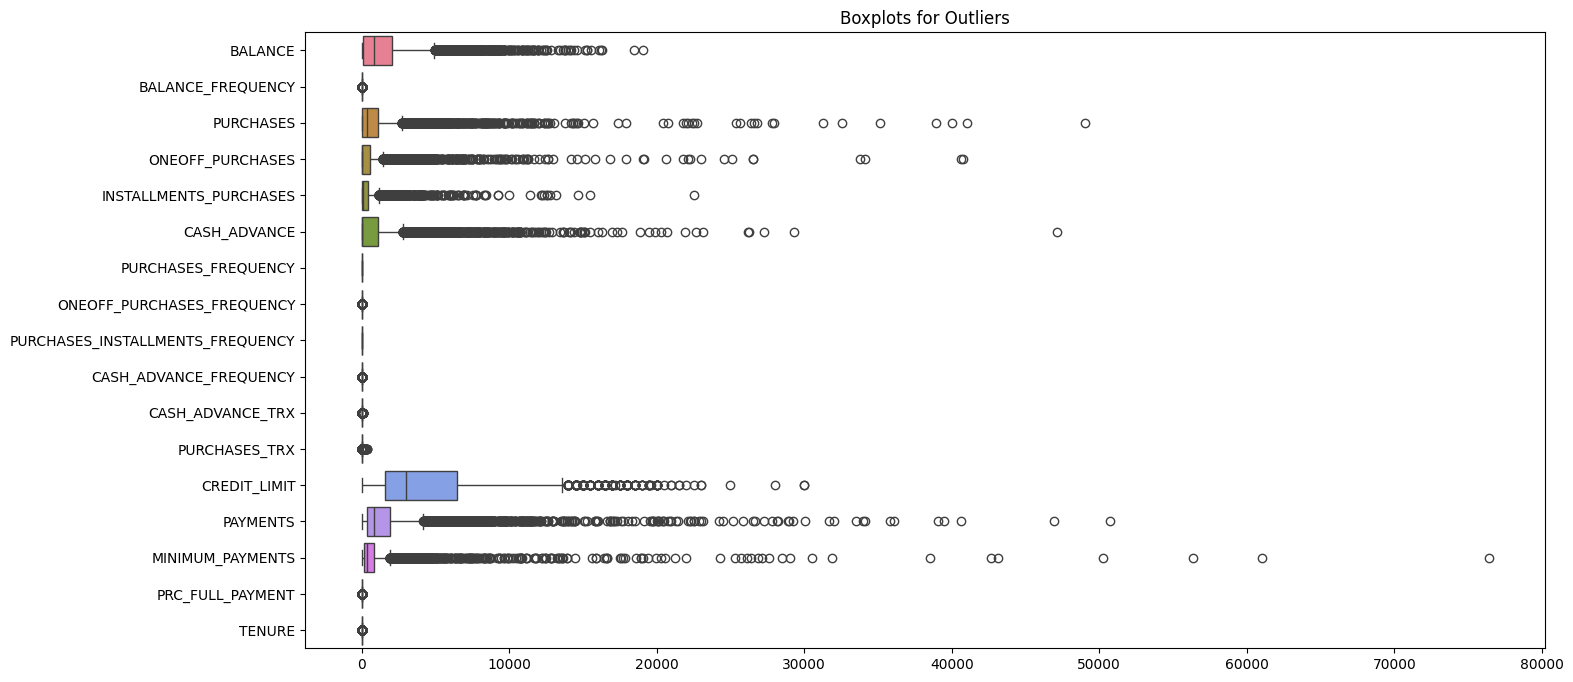

In [37]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots for Outliers")
plt.show()

# Outlier Handling

In [38]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('TENURE')
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bounds for Outliers:")
print(lower_bound)
print("\nUpper Bounds for Outliers:")
print(upper_bound)

Lower Bounds for Outliers:
BALANCE                            -2760.505265
BALANCE_FREQUENCY                      0.722223
PURCHASES                          -1566.107500
ONEOFF_PURCHASES                    -866.107500
INSTALLMENTS_PURCHASES              -702.956250
CASH_ADVANCE                       -1670.731709
PURCHASES_FREQUENCY                   -1.166668
ONEOFF_PURCHASES_FREQUENCY            -0.450000
PURCHASES_INSTALLMENTS_FREQUENCY      -1.125000
CASH_ADVANCE_FREQUENCY                -0.333333
CASH_ADVANCE_TRX                      -6.000000
PURCHASES_TRX                        -23.000000
CREDIT_LIMIT                       -5750.000000
PAYMENTS                           -1893.511060
MINIMUM_PAYMENTS                    -869.165678
PRC_FULL_PAYMENT                      -0.214286
dtype: float64

Upper Bounds for Outliers:
BALANCE                              4942.927215
BALANCE_FREQUENCY                       1.166666
PURCHASES                            2715.872500
ONEOFF_PURCHASE

In [39]:
for col in numerical_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1390.508973,0.931587,737.149330,354.358139,295.546214,672.468924,0.490351,0.184773,0.364437,0.126061,2.383128,11.623799,4419.304199,1347.084165,593.711582,0.087223,11.517318
std,1537.538479,0.110984,879.534788,511.823289,396.181546,998.514970,0.401371,0.255668,0.397448,0.172676,3.417878,13.041645,3383.755481,1272.806272,572.040335,0.138616,1.338331
min,0.000000,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,4942.927215,1.000000,2715.872500,1443.512500,1171.593750,2784.552848,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4177.921543,1904.229874,0.357143,12.000000


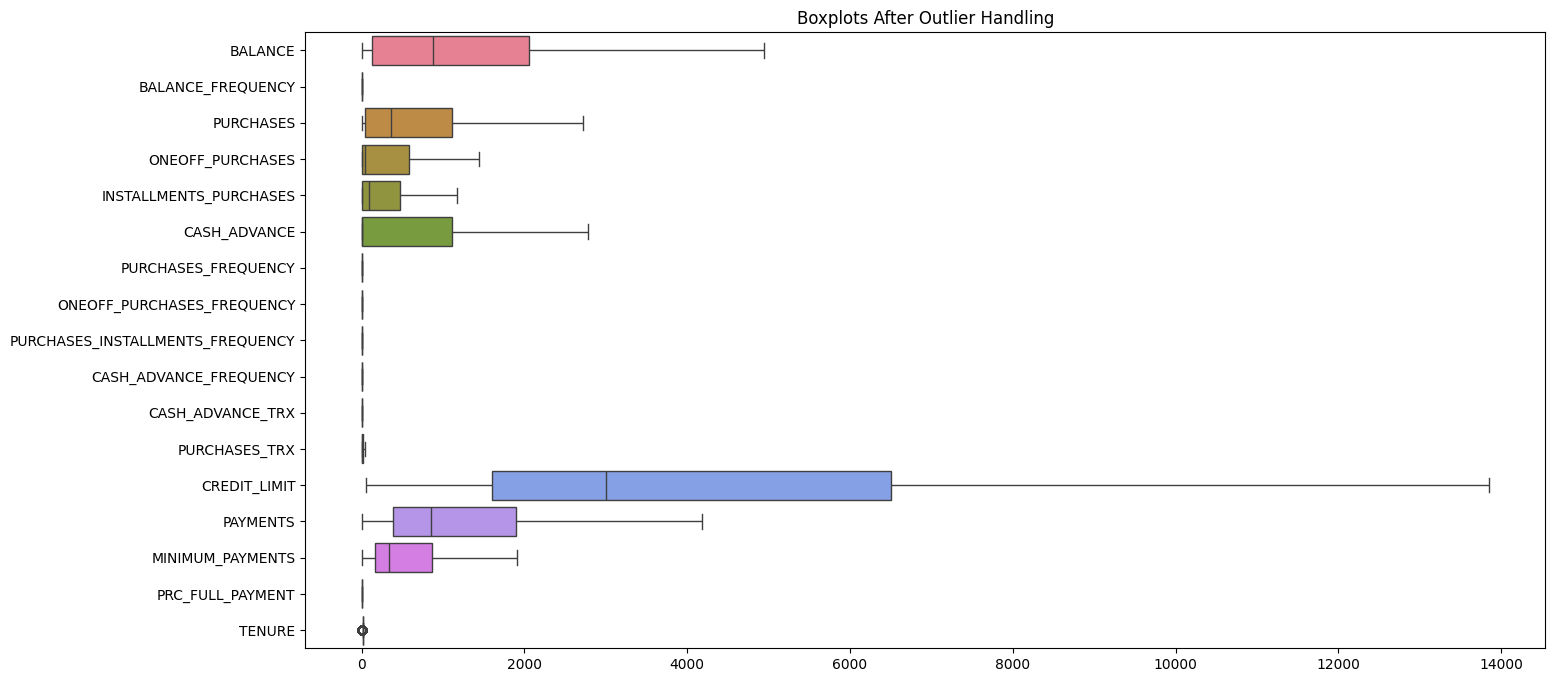

In [40]:
display(df.describe())

plt.figure(figsize=(16, 8))
sns.boxplot(data=df.drop('CUST_ID', axis=1), orient="h")
plt.title("Boxplots After Outlier Handling")
plt.show()

# Feature Engineering & Preprocessing

In [41]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'CUST_ID' in numerical_cols:
    numerical_cols.remove('CUST_ID')

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

In [42]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

In [43]:
df_pca = pd.DataFrame(df_pca)
display(df_pca.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.624789,-2.381615,-0.255016,-0.659427,0.171144,-0.005619,-0.901622,-0.115766,-0.199634,-0.042360,0.087917,-0.162744,0.083088,-0.030087,0.043520,-0.077022,-0.030636
1,-2.158390,2.289497,-0.557901,1.030608,2.194329,-0.060201,0.500140,1.212492,0.211724,0.807729,0.627490,-0.157175,0.267064,0.004628,-0.272555,0.088456,-0.009792
2,1.198983,0.280708,-1.535004,-1.951334,-0.792513,-0.099595,1.060954,-0.979777,0.536998,0.739019,-0.110590,-0.459347,-0.200675,-0.901489,0.134565,-0.449604,-0.295807
3,-0.495849,-0.185931,-2.271893,-1.004749,0.368661,-1.419361,-1.056770,-0.883699,0.327436,-1.455257,0.236042,1.532319,-0.158221,0.063738,-0.214993,0.123402,-0.202691
4,-1.632622,-1.597279,-0.210639,-1.404927,-0.126787,0.621528,0.122685,0.595371,-0.523931,0.098988,0.091617,-0.301764,0.148259,-0.034283,0.095680,0.046790,0.050180


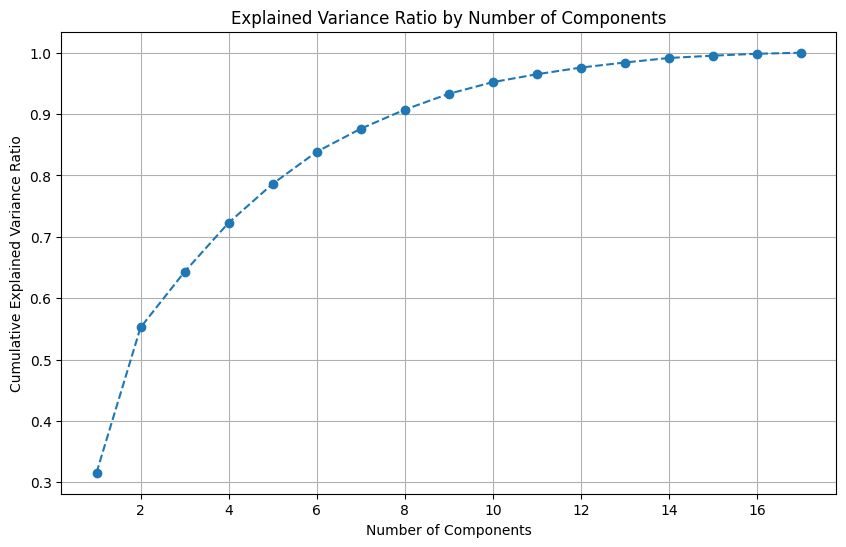

In [44]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [45]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)
display(df_pca.head())
print(f"Number of components chosen: {pca.n_components_}")

,0,1,2,3,4,5,6,7,8,9
0,-1.624789,-2.381615,-0.255016,-0.659427,0.171144,-0.005619,-0.901622,-0.115766,-0.199634,-0.042360
1,-2.158390,2.289497,-0.557901,1.030608,2.194329,-0.060201,0.500140,1.212492,0.211724,0.807729
2,1.198983,0.280708,-1.535004,-1.951334,-0.792513,-0.099595,1.060954,-0.979777,0.536998,0.739019
3,-0.495849,-0.185931,-2.271893,-1.004749,0.368661,-1.419361,-1.056770,-0.883699,0.327436,-1.455257
4,-1.632622,-1.597279,-0.210639,-1.404927,-0.126787,0.621528,0.122685,0.595371,-0.523931,0.098988


Number of components chosen: 10


In [46]:
df['ONEOFF_PURCHASES_RATIO'] = np.where(df['PURCHASES'] != 0, df['ONEOFF_PURCHASES'] / df['PURCHASES'], 0)
df['INSTALLMENTS_PURCHASES_RATIO'] = np.where(df['PURCHASES'] != 0, df['INSTALLMENTS_PURCHASES'] / df['PURCHASES'], 0)
df['CASH_ADVANCE_CREDIT_LIMIT_RATIO'] = np.where(df['CREDIT_LIMIT'] != 0, df['CASH_ADVANCE'] / df['CREDIT_LIMIT'], 0)
df['AVG_PURCHASE_AMOUNT'] = np.where(df['PURCHASES_TRX'] != 0, df['PURCHASES'] / df['PURCHASES_TRX'], 0)
df['AVG_CASH_ADVANCE_AMOUNT'] = np.where(df['CASH_ADVANCE_TRX'] != 0, df['CASH_ADVANCE'] / df['CASH_ADVANCE_TRX'], 0)
df['PAYMENTS_MINIMUM_PAYMENT_RATIO'] = np.where(df['MINIMUM_PAYMENTS'] != 0, df['PAYMENTS'] / df['MINIMUM_PAYMENTS'], 0)
df['CREDIT_LIMIT_UTILIZATION'] = np.where(df['CREDIT_LIMIT'] != 0, df['BALANCE'] / df['CREDIT_LIMIT'], 0)

display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ONEOFF_PURCHASES_RATIO,INSTALLMENTS_PURCHASES_RATIO,CASH_ADVANCE_CREDIT_LIMIT_RATIO,AVG_PURCHASE_AMOUNT,AVG_CASH_ADVANCE_AMOUNT,PAYMENTS_MINIMUM_PAYMENT_RATIO,CREDIT_LIMIT_UTILIZATION
0,C10001,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,...,139.509787,0.000000,12,0.000000,1.0,0.000000,47.700000,0.000000,1.446508,0.040901
1,C10002,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,...,1072.340217,0.222222,12,0.000000,0.0,0.397793,0.000000,696.138212,3.826241,0.457495
2,C10003,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,...,627.284787,0.000000,12,1.000000,0.0,0.000000,64.430833,0.000000,0.991682,0.332687
3,C10004,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,...,864.206542,0.000000,12,0.962984,0.0,0.027438,1499.000000,205.788017,0.000000,0.222223
4,C10005,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,...,244.791237,0.000000,12,1.000000,0.0,0.000000,16.000000,0.000000,2.771075,0.681429


In [47]:
data_for_clustering = df_pca
display(data_for_clustering.head())

,0,1,2,3,4,5,6,7,8,9
0,-1.624789,-2.381615,-0.255016,-0.659427,0.171144,-0.005619,-0.901622,-0.115766,-0.199634,-0.042360
1,-2.158390,2.289497,-0.557901,1.030608,2.194329,-0.060201,0.500140,1.212492,0.211724,0.807729
2,1.198983,0.280708,-1.535004,-1.951334,-0.792513,-0.099595,1.060954,-0.979777,0.536998,0.739019
3,-0.495849,-0.185931,-2.271893,-1.004749,0.368661,-1.419361,-1.056770,-0.883699,0.327436,-1.455257
4,-1.632622,-1.597279,-0.210639,-1.404927,-0.126787,0.621528,0.122685,0.595371,-0.523931,0.098988


# Unsupervised Learning Algorithm (Clustering)

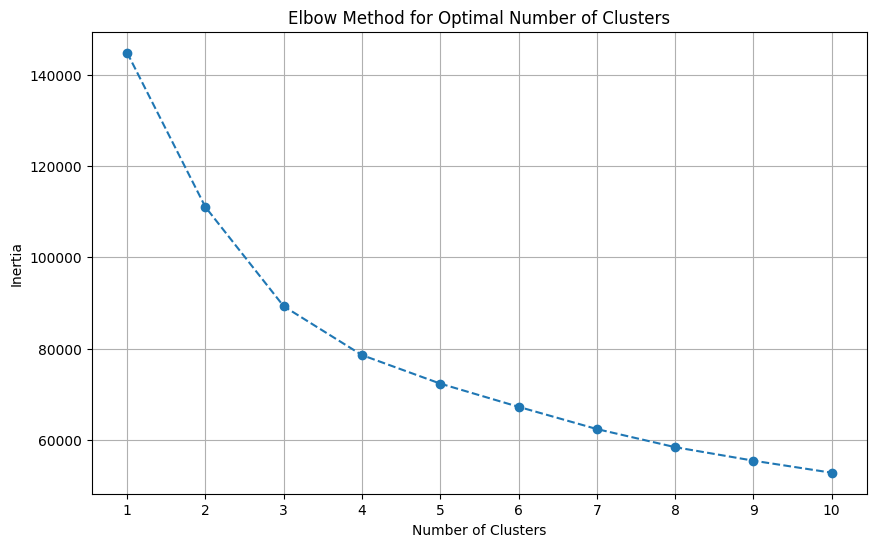

In [48]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [49]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(data_for_clustering)
df['cluster_label'] = kmeans.labels_

In [50]:
silhouette_avg = silhouette_score(data_for_clustering, df['cluster_label'])
print(f"Silhouette Score: {silhouette_avg}")

inertia_value = kmeans.inertia_
print(f"Inertia: {inertia_value}")

Silhouette Score: 0.2003772068381206
Inertia: 72312.6404079904


In [51]:
cluster_characteristics = df.groupby('cluster_label')[numerical_cols].mean()
display(cluster_characteristics)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_label,,,,,,,,,,,,,,,,,
0,3168.528336,0.965661,300.587282,173.110812,108.428462,2273.680000,0.232705,0.095802,0.145190,0.392164,7.856173,4.692593,6229.827909,2030.534746,1111.321434,0.029832,11.335802
1,176.667243,0.737489,316.091080,194.388447,107.273333,327.521999,0.266995,0.089936,0.165695,0.048573,0.821776,4.034063,3573.107968,820.844320,244.471639,0.127781,11.102798
2,1854.145965,0.980084,2242.312637,1198.844605,693.264734,416.666410,0.903519,0.579797,0.639980,0.074402,1.430712,31.622971,6888.097265,2564.046322,673.883550,0.129013,11.865793
3,544.879250,0.959655,772.506483,109.106341,582.870138,115.915921,0.905116,0.085040,0.837849,0.027159,0.475551,16.912413,3148.887722,878.904442,421.644166,0.154764,11.508329
4,1366.278156,0.991852,252.389545,201.482349,43.992674,410.962658,0.198316,0.118567,0.076303,0.109471,1.832659,3.448043,3010.098965,753.137899,561.055027,0.012393,11.712551


In [52]:
print("Cluster Characteristics:")
for i in range(len(cluster_characteristics)):
    print(f"\nCluster {i}:")
    print(cluster_characteristics.iloc[i])

Cluster Characteristics:

Cluster 0:
BALANCE                             3168.528336
BALANCE_FREQUENCY                      0.965661
PURCHASES                            300.587282
ONEOFF_PURCHASES                     173.110812
INSTALLMENTS_PURCHASES               108.428462
CASH_ADVANCE                        2273.680000
PURCHASES_FREQUENCY                    0.232705
ONEOFF_PURCHASES_FREQUENCY             0.095802
PURCHASES_INSTALLMENTS_FREQUENCY       0.145190
CASH_ADVANCE_FREQUENCY                 0.392164
CASH_ADVANCE_TRX                       7.856173
PURCHASES_TRX                          4.692593
CREDIT_LIMIT                        6229.827909
PAYMENTS                            2030.534746
MINIMUM_PAYMENTS                    1111.321434
PRC_FULL_PAYMENT                       0.029832
TENURE                                11.335802
Name: 0, dtype: float64

Cluster 1:
BALANCE                              176.667243
BALANCE_FREQUENCY                      0.737489
PURCHASES      

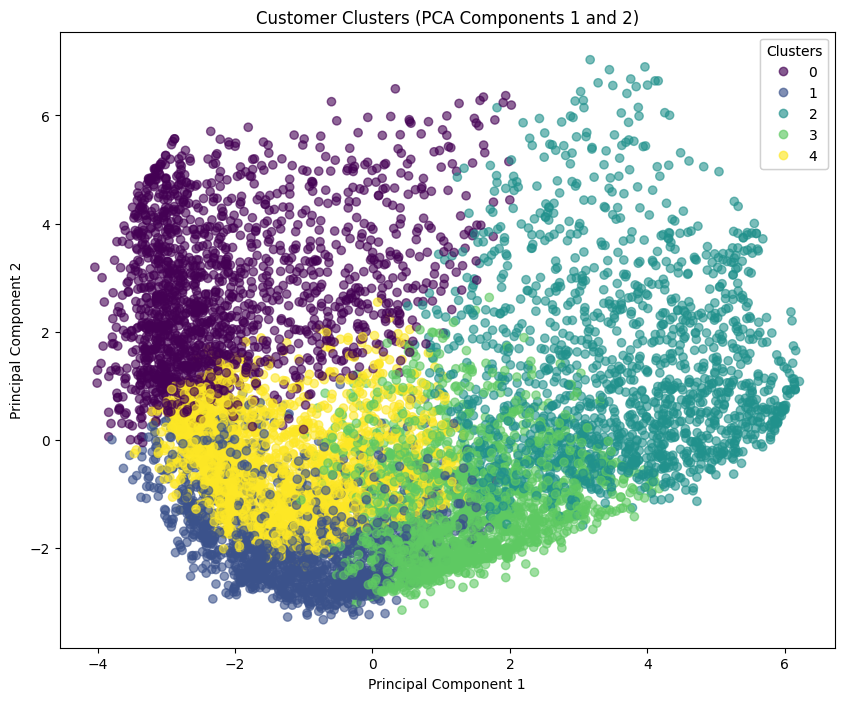

In [54]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=df['cluster_label'], cmap='viridis', alpha=0.6)
plt.title("Customer Clusters (PCA Components 1 and 2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()

# Classification

In [55]:
X = df_pca
y = df['cluster_label']
display(X.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9
0,-1.624789,-2.381615,-0.255016,-0.659427,0.171144,-0.005619,-0.901622,-0.115766,-0.199634,-0.042360
1,-2.158390,2.289497,-0.557901,1.030608,2.194329,-0.060201,0.500140,1.212492,0.211724,0.807729
2,1.198983,0.280708,-1.535004,-1.951334,-0.792513,-0.099595,1.060954,-0.979777,0.536998,0.739019
3,-0.495849,-0.185931,-2.271893,-1.004749,0.368661,-1.419361,-1.056770,-0.883699,0.327436,-1.455257
4,-1.632622,-1.597279,-0.210639,-1.404927,-0.126787,0.621528,0.122685,0.595371,-0.523931,0.098988


,cluster_label
0,1
1,0
2,4
3,1
4,4


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7160, 10)
Shape of X_test: (1790, 10)
Shape of y_train: (7160,)
Shape of y_test: (1790,)


In [57]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
from sklearn.metrics import accuracy_score

y_pred = rf_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
display(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy}")

Confusion Matrix:


array([[309,   0,   2,   0,   2],
       [  3, 312,   0,   3,   2],
       [  1,   1, 327,   6,   2],
       [  1,   3,   4, 349,   5],
       [  9,   3,   3,   1, 442]])


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       313
           1       0.98      0.97      0.98       320
           2       0.97      0.97      0.97       337
           3       0.97      0.96      0.97       362
           4       0.98      0.97      0.97       458

    accuracy                           0.97      1790
   macro avg       0.97      0.97      0.97      1790
weighted avg       0.97      0.97      0.97      1790


Accuracy Score: 0.9715083798882681
